In [1]:
import google.cloud.bigquery as bq
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.dpi']= 360

In [3]:
%matplotlib inline
%load_ext google.cloud.bigquery

In [4]:
%%bigquery hrcn

WITH hurricanes AS
(
SELECT
  CAST(season AS INT64) AS season_int,
  sid,
  max(WMO_WIND) max_windspeed
FROM
  `bigquery-public-data.noaa_hurricanes.hurricanes`
WHERE
  basin = "NA"
  AND WMO_WIND IS NOT NULL
  AND CAST(season AS INT64) > 1966
GROUP BY
  season_int, sid
)

SELECT
  season_int,
  sid,
  CASE
    WHEN max_windspeed <= 33 THEN 'depression'
    WHEN max_windspeed <= 63 THEN 'storm'
    WHEN max_windspeed <= 82 THEN 'cat_1'
    WHEN max_windspeed <= 95 THEN 'cat_2'
    WHEN max_windspeed <= 112 THEN 'cat_3'
    WHEN max_windspeed <= 136 THEN 'cat_4'
    ELSE 'cat_5'
  END AS category,
FROM hurricanes

In [5]:
decade_bins = list(range(1850, 2030, 10))

hrcn['decade'] = pd.cut(x=hrcn.season_int, bins=decade_bins, labels=decade_bins[1:])

In [6]:
hrcn_pivot = pd.pivot_table(data=hrcn,
                            index='decade',
                            columns='category',
                            values='sid',
                            aggfunc='count',
                            fill_value=0)

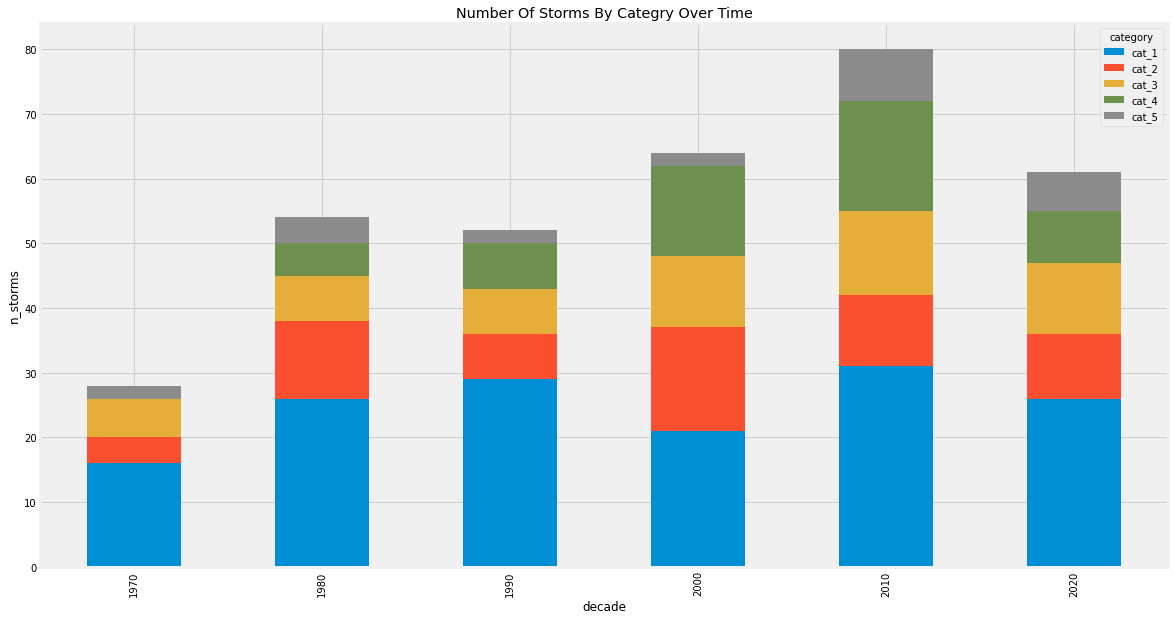

In [7]:
sel_cat = ['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']

(
    hrcn_pivot[sel_cat]
    .plot.bar(
        stacked=True,
        figsize=(18, 10),
        title='Number Of Storms By Categry Over Time'
    )
)

plt.ylabel('n_storms')
plt.xlabel('decade')
plt.show()